In [3]:
import os
import pandas as pd
"""import sys
project_path = os.path.join(*([os.sep]+os.path.normpath(os.getcwd()).split(os.sep)[:5]))
if project_path not in sys.path: sys.path.append(project_path)"""

from project.input.resources import resources_data
from project.model import get_inputs
from project.utils import subplots_attributes, subplots_pie, plot_attribute, plot_attribute2attribute
from project.utils import cumulated_plot,cumulated_plots



In [4]:
output = 'output/description_stock'
if not os.path.isdir(output):
    os.mkdir(output)

## Loading inputs
Inputs come from the Res-IRF reference scenario.

In [5]:
inputs = get_inputs(variables=['buildings'])
buildings = inputs['buildings']

From 22560 to 15840


2023-03-07 11:47:20,099 - 39151 - log_ - INFO - Creating AgentBuildings object


## General description

In [6]:
stock = buildings.simplified_stock(energy_level=True)
stock = stock.groupby(['Occupancy status', 'Income owner', 'Income tenant', 'Housing type', 'Energy', 'Performance']).sum()

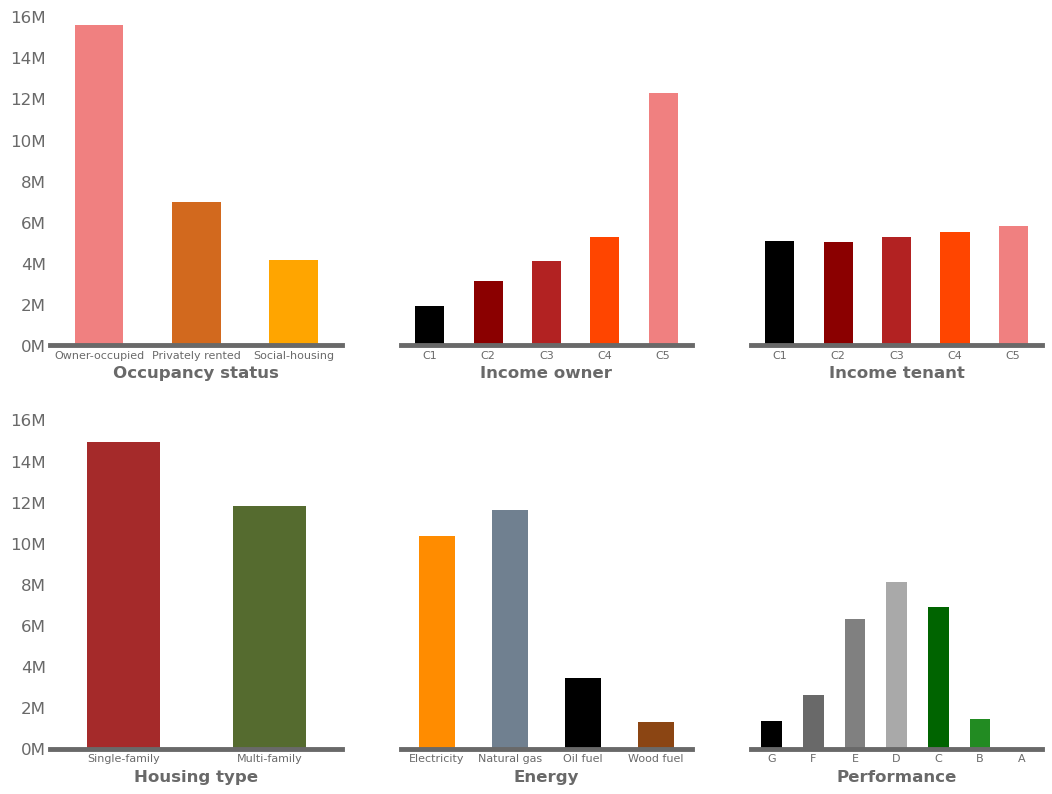

In [7]:
subplots_attributes(stock, dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=False, sharey=True)
subplots_attributes(stock, dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=False, sharey=True, save=os.path.join(output, 'stock_sdes2018_all.png'))

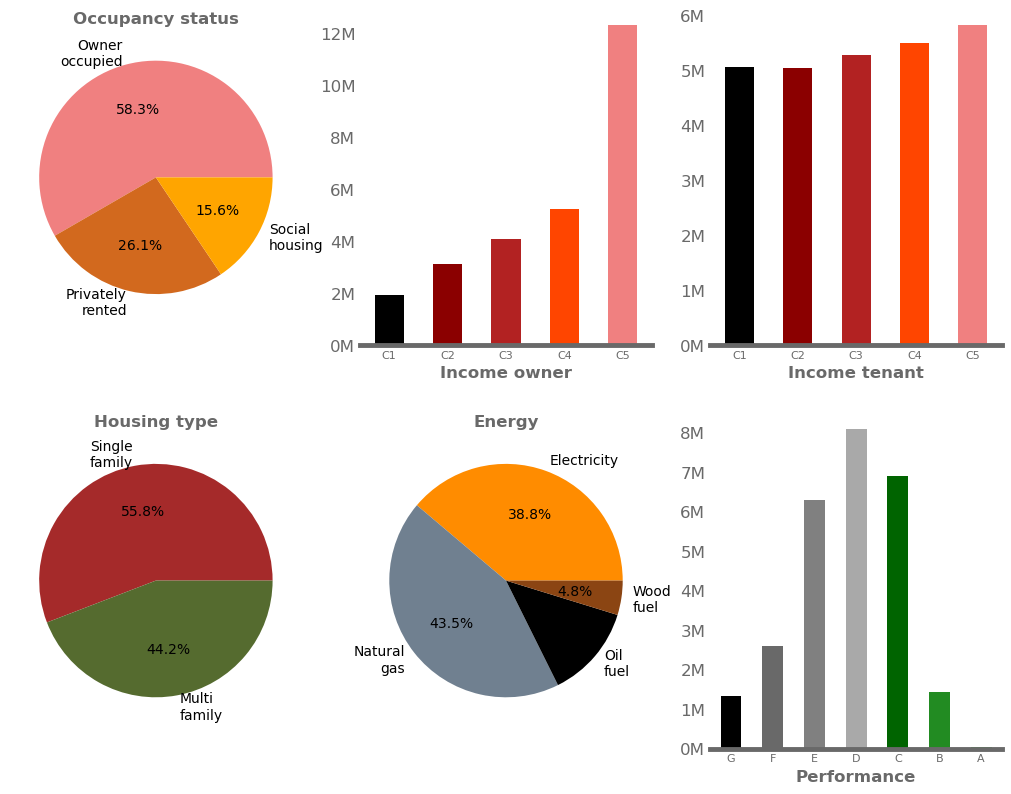

In [8]:
subplots_pie(stock, dict_order=resources_data['index'], pie=['Housing type', 'Energy', 'Occupancy status'], dict_color=resources_data['colors'], percent=False)


In [9]:
plot_attribute(stock, attribute='Performance', dict_order=resources_data['index'], percent=False, dict_color=resources_data['colors'], width=0.4,
               save='output/stock_sdes2018_energy_performance.png', figsize=(8.0, 6.0))

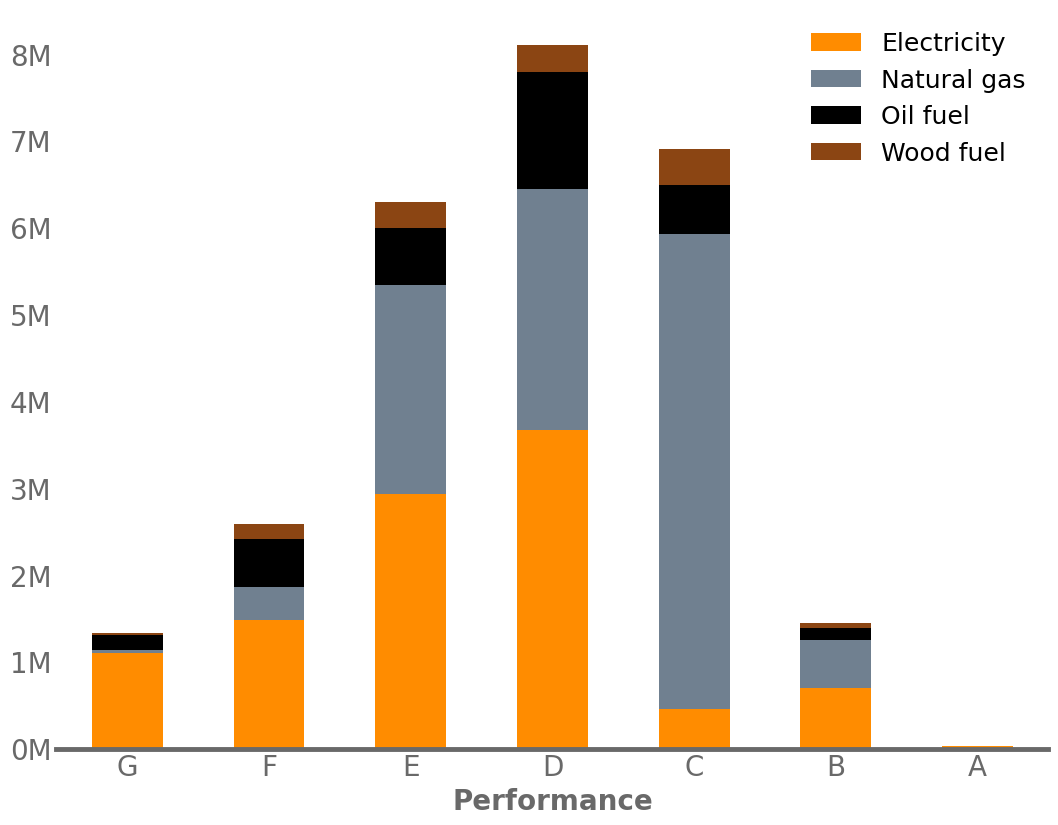

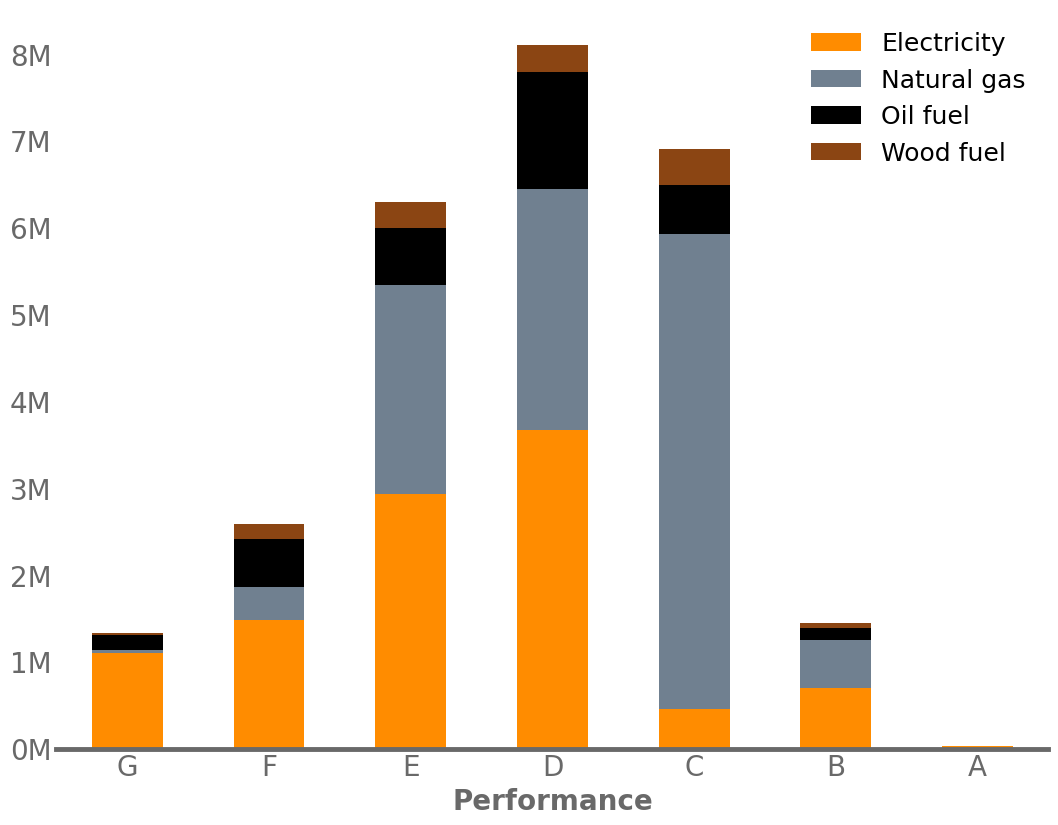

In [10]:
plot_attribute2attribute(stock, 'Performance', 'Energy', dict_order=resources_data['index'], dict_color=resources_data['colors'])
plot_attribute2attribute(stock, 'Performance', 'Energy', dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=False)
plot_attribute2attribute(stock, 'Performance', 'Energy', dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=False, save='output/stock_sdes2018_dpe_energy.png')

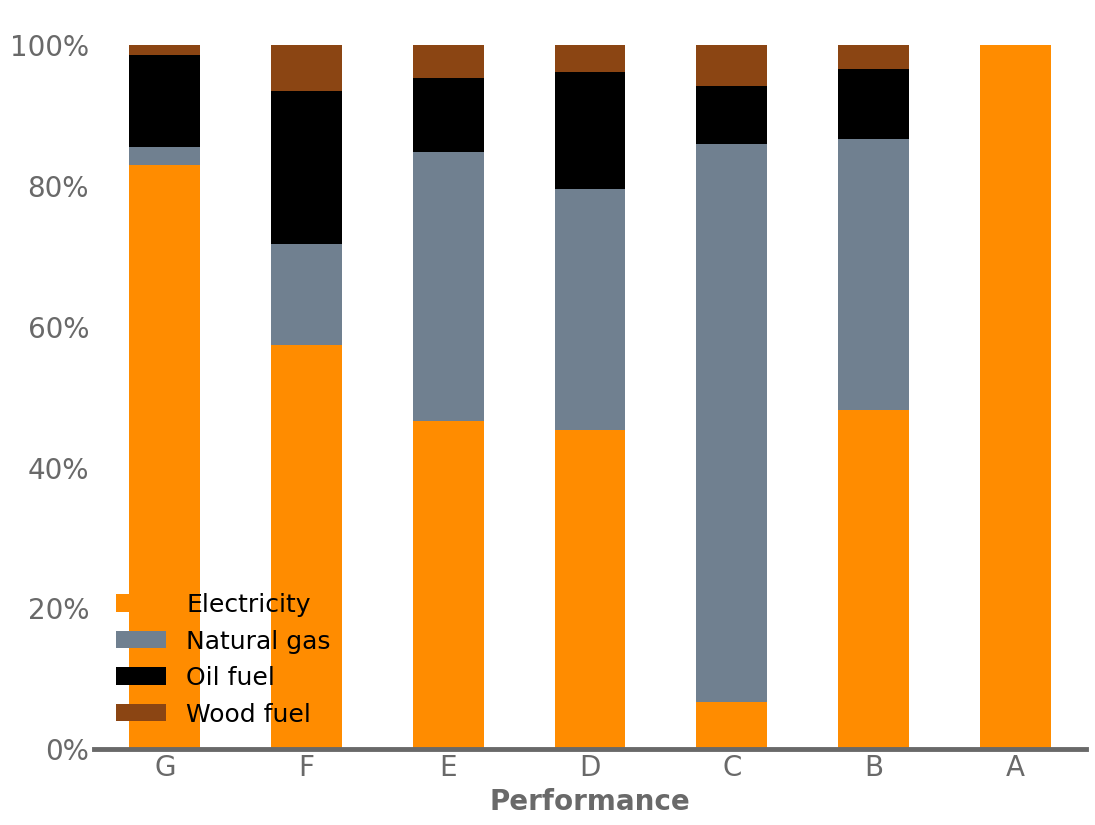

In [11]:
plot_attribute2attribute(stock, 'Performance', 'Energy', dict_order=resources_data['index'], dict_color=resources_data['colors'], percent=True)

### Table

Energy by energy performance certificate

In [12]:
stock.groupby(['Performance', 'Energy']).sum().unstack('Energy')

Energy,Electricity,Natural gas,Oil fuel,Wood fuel
Performance,,,,
A,2.900961e+04,0.000000e+00,0.000000e+00,0.000000
B,6.930047e+05,5.542604e+05,1.436158e+05,50672.091440
C,4.604334e+05,5.467209e+06,5.646700e+05,410453.453859
D,3.666630e+06,2.781395e+06,1.342176e+06,317114.015014
E,2.931837e+06,2.408694e+06,6.566613e+05,301206.813145
F,1.484118e+06,3.721765e+05,5.618192e+05,170888.592599
G,1.102514e+06,3.467382e+04,1.733617e+05,20097.383396


Energy by energy performance certificate (%)

In [13]:
(stock.groupby(['Performance', 'Energy']).sum().unstack('Energy').T / stock.groupby(['Performance', 'Energy']).sum().unstack('Energy').sum(axis=1)).T

Energy,Electricity,Natural gas,Oil fuel,Wood fuel
Performance,,,,
A,1.000000,0.000000,0.000000,0.000000
B,0.480735,0.384488,0.099626,0.035151
C,0.066703,0.792032,0.081803,0.059462
D,0.452262,0.343072,0.165551,0.039115
E,0.465489,0.382430,0.104258,0.047823
F,0.573239,0.143753,0.217002,0.066006
G,0.828555,0.026058,0.130284,0.015103


## Description of the thermal performance

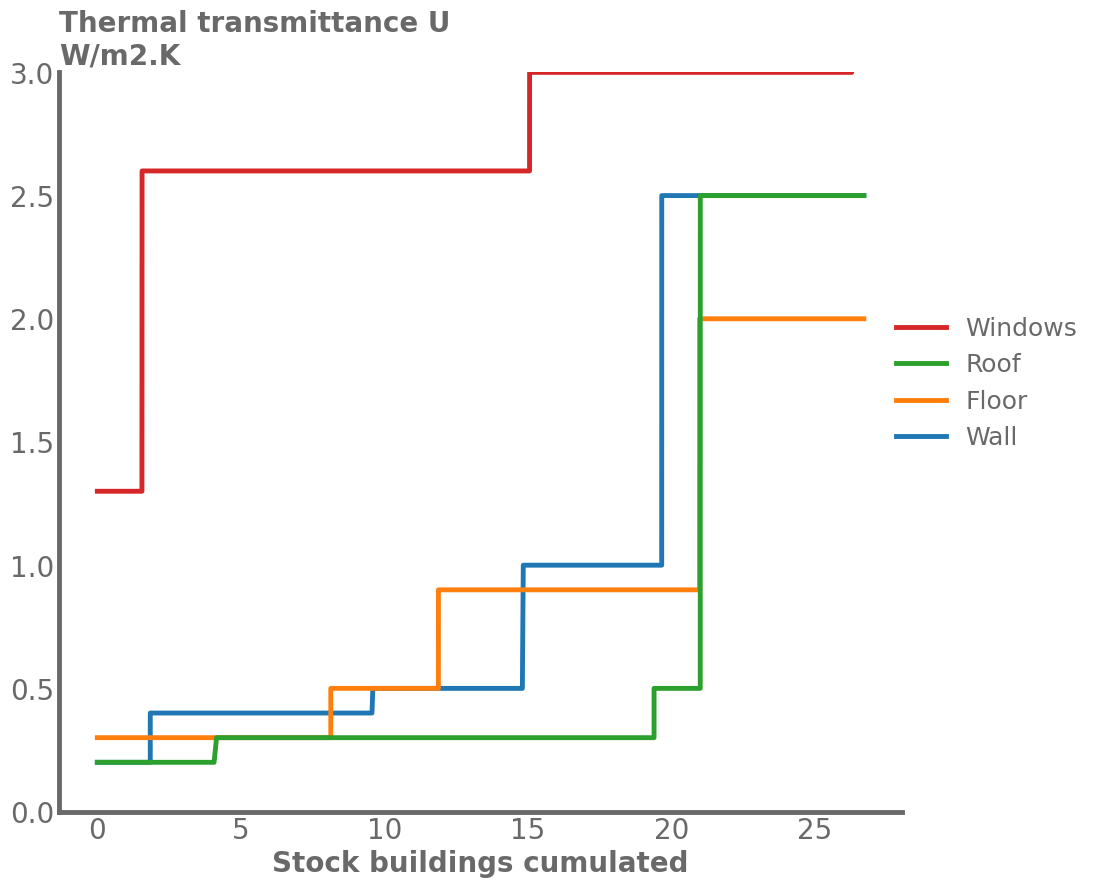

In [14]:
temp = dict()
for i in ['Wall', 'Floor', 'Roof', 'Windows']:
    y = pd.Series(buildings.stock.index.get_level_values(i), index=buildings.stock.index, name='{} insulation (W/m2.K)'.format(i)).astype('float')
    x = buildings.stock / 10**6
    temp.update({i: cumulated_plot(x, y, plot=False)})
cumulated_plots(temp, 'Thermal transmittance U (W/m2.K)', ylim=3)

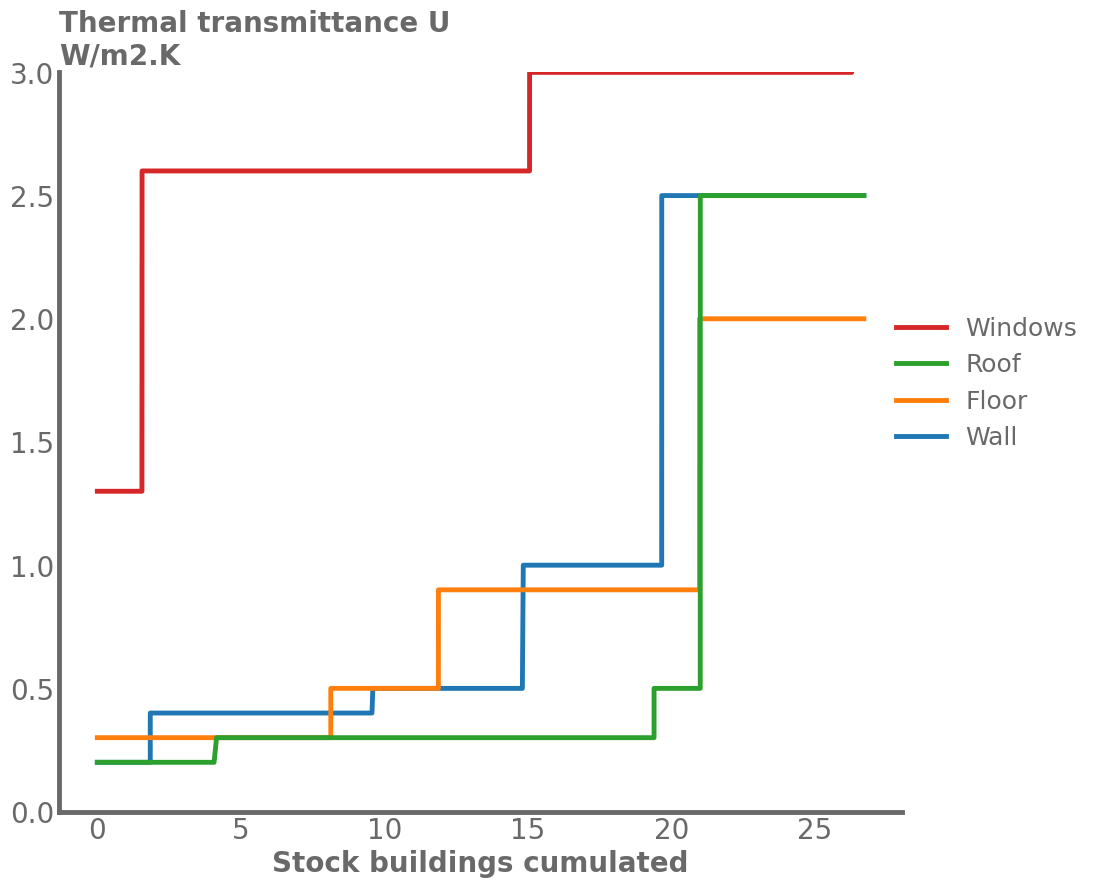

In [15]:
cumulated_plots(temp, 'Thermal transmittance U (W/m2.K)', ylim=3)

In [16]:
stock.groupby(['Housing type', 'Occupancy status', 'Performance']).sum().to_csv(os.path.join(output, 'stock_grouped.csv'))